<a href="https://colab.research.google.com/github/Dhruv-Limbani/Financial-Sentiment-Analysis-using-NLP/blob/master/Data_Analysis_Financial_Phrasebank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [43]:
!pip install datasets

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from datasets import load_dataset

In [45]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Data

In [46]:
dataset = load_dataset("financial_phrasebank", name="sentences_allagree", split='train')
df = dataset.to_pandas()
df

,sentence,label
0,"According to Gran , the company has no plans t...",1
1,"For the last quarter of 2010 , Componenta 's n...",2
2,"In the third quarter of 2010 , net sales incre...",2
3,Operating profit rose to EUR 13.1 mn from EUR ...,2
4,"Operating profit totalled EUR 21.1 mn , up fro...",2
...,...,...
2259,Operating result for the 12-month period decre...,0
2260,HELSINKI Thomson Financial - Shares in Cargote...,0
2261,LONDON MarketWatch -- Share prices ended lower...,0
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0


In [47]:
label = { 0: 'negative', 1: 'neutral', 2: 'positive'}
df['Sentiment'] = df['label'].map(label)

In [48]:
print(f"Number of Documents: {df.shape[0]}")

Number of Documents: 2264


## Document's Text length Analysis and Distribution

In [49]:
df['text_length'] = df['sentence'].apply(lambda x: len(x))
df

,sentence,label,Sentiment,text_length
0,"According to Gran , the company has no plans t...",1,neutral,127
1,"For the last quarter of 2010 , Componenta 's n...",2,positive,193
2,"In the third quarter of 2010 , net sales incre...",2,positive,125
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive,122
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive,103
...,...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative,143
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative,248
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative,144
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative,108


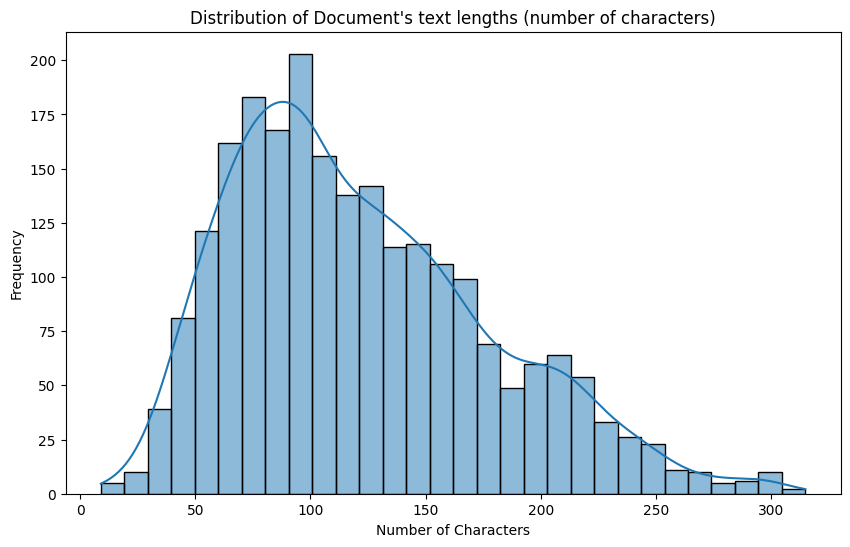

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title("Distribution of Document's text lengths (number of characters)")
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

## Class Distribution

<ipython-input-51-c2de753c7a71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


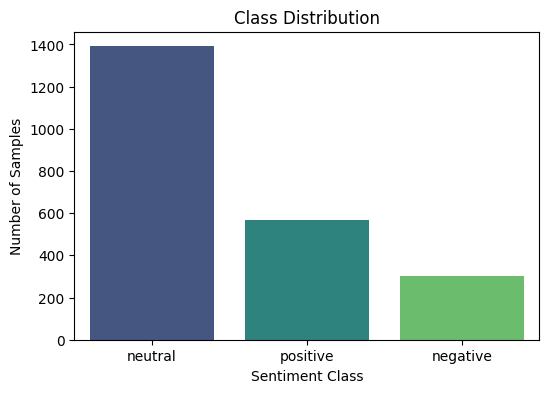

Class distribution:
 Sentiment
neutral     1391
positive     570
negative     303
Name: count, dtype: int64


In [51]:
class_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.show()

print('Class distribution:\n', class_counts)

## Cleaning text: removing special characters, stopwords and applying Lemmatization

In [52]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [53]:
df['cleaned_text'] = df['sentence'].apply(clean_text)
df

,sentence,label,Sentiment,text_length,cleaned_text
0,"According to Gran , the company has no plans t...",1,neutral,127,according gran company plan move production ru...
1,"For the last quarter of 2010 , Componenta 's n...",2,positive,193,last quarter 2010 componenta net sale doubled ...
2,"In the third quarter of 2010 , net sales incre...",2,positive,125,third quarter 2010 net sale increased 5 2 eur ...
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive,122,operating profit rose eur 13 1 mn eur 8 7 mn c...
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive,103,operating profit totalled eur 21 1 mn eur 18 6...
...,...,...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative,143,operating result 12 month period decreased pro...
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative,248,helsinki thomson financial share cargotec fell...
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative,144,london marketwatch share price ended lower lon...
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative,108,operating profit fell eur 35 4 mn eur 68 8 mn ...


## Word Frequency Analysis and Most Common words

In [54]:
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(30)
common_words

[('eur', 756),
 ('mn', 439),
 ('company', 384),
 ('profit', 325),
 ('1', 309),
 ('net', 292),
 ('sale', 279),
 ('year', 274),
 ('share', 266),
 ('million', 266),
 ('2', 226),
 ('finnish', 224),
 ('3', 224),
 ('5', 221),
 ('4', 215),
 ('said', 206),
 ('operating', 202),
 ('mln', 199),
 ('period', 194),
 ('quarter', 188),
 ('0', 183),
 ('6', 181),
 ('2009', 181),
 ('2008', 171),
 ('2007', 170),
 ('8', 164),
 ('group', 163),
 ('7', 156),
 ('2010', 151),
 ('9', 149)]

In [55]:
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

<ipython-input-56-2ab52b8245b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_r')


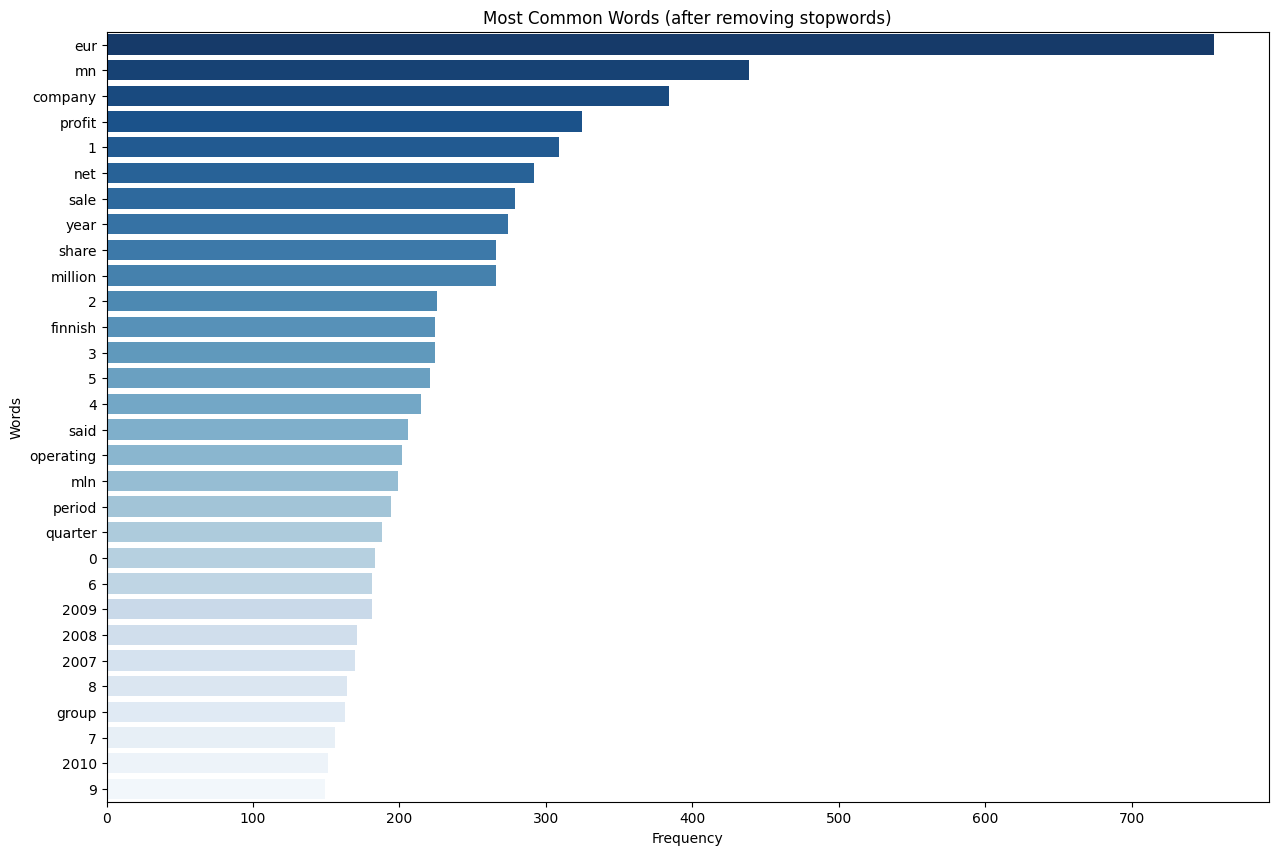

Top 10 most common words:


,Word,Frequency
0,eur,756
1,mn,439
2,company,384
3,profit,325
4,1,309
5,net,292
6,sale,279
7,year,274
8,share,266
9,million,266


In [56]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_r')
plt.title('Most Common Words (after removing stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

print("Top 10 most common words:")
common_words_df[:15]

## Word Length and Document Length analysis after text cleaning

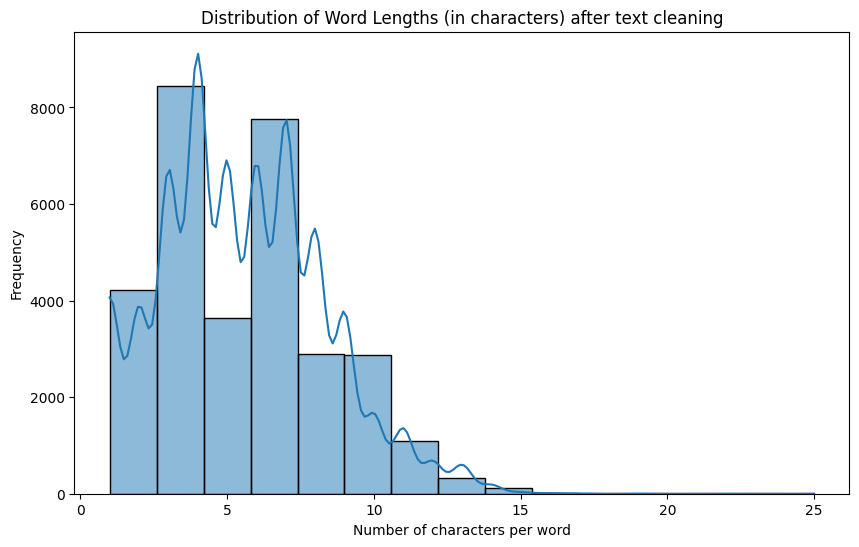

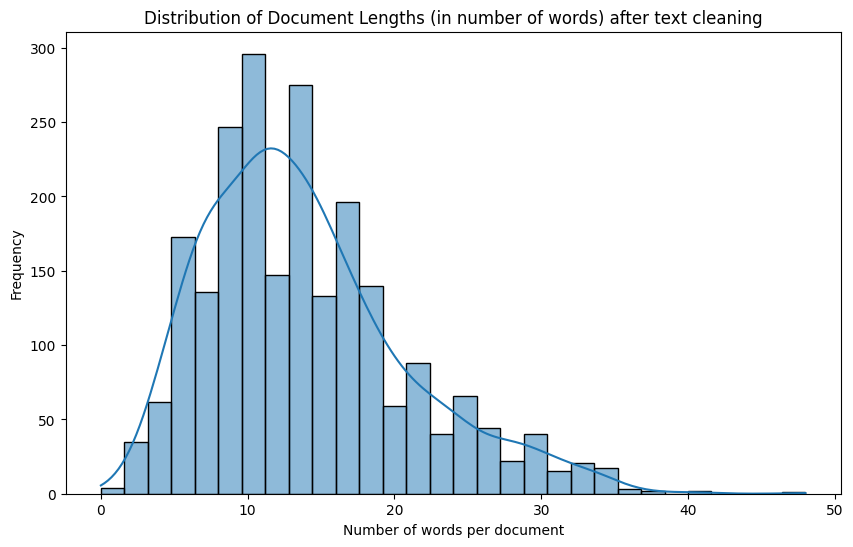

Average word length: 5.54 characters
Average document length: 13.86 words


In [57]:
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

df['word_lengths'] = df['tokenized_text'].apply(lambda x: [len(word) for word in x])

all_word_lengths = [length for sublist in df['word_lengths'] for length in sublist]

plt.figure(figsize=(10, 6))
sns.histplot(all_word_lengths, bins=15, kde=True)
plt.title('Distribution of Word Lengths (in characters) after text cleaning')
plt.xlabel('Number of characters per word')
plt.ylabel('Frequency')
plt.show()

df['document_length'] = df['tokenized_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['document_length'], bins=30, kde=True)
plt.title('Distribution of Document Lengths (in number of words) after text cleaning')
plt.xlabel('Number of words per document')
plt.ylabel('Frequency')
plt.show()

print(f'Average word length: {sum(all_word_lengths) / len(all_word_lengths):.2f} characters')
print(f'Average document length: {df["document_length"].mean():.2f} words')

## N-Gram Analysis

In [58]:
def get_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

In [59]:
df['bigrams'] = df['cleaned_text'].apply(lambda x: get_ngrams(x, 2))

In [60]:
df

,sentence,label,Sentiment,text_length,cleaned_text,tokenized_text,word_lengths,document_length,bigrams
0,"According to Gran , the company has no plans t...",1,neutral,127,according gran company plan move production ru...,"[according, gran, company, plan, move, product...","[9, 4, 7, 4, 4, 10, 6, 8, 7, 7]",10,"[(according, gran), (gran, company), (company,..."
1,"For the last quarter of 2010 , Componenta 's n...",2,positive,193,last quarter 2010 componenta net sale doubled ...,"[last, quarter, 2010, componenta, net, sale, d...","[4, 7, 4, 10, 3, 4, 7, 7, 6, 6, 4, 7, 5, 4, 3,...",21,"[(last, quarter), (quarter, 2010), (2010, comp..."
2,"In the third quarter of 2010 , net sales incre...",2,positive,125,third quarter 2010 net sale increased 5 2 eur ...,"[third, quarter, 2010, net, sale, increased, 5...","[5, 7, 4, 3, 4, 9, 1, 1, 3, 3, 1, 2, 9, 6, 2, ...",20,"[(third, quarter), (quarter, 2010), (2010, net..."
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive,122,operating profit rose eur 13 1 mn eur 8 7 mn c...,"[operating, profit, rose, eur, 13, 1, mn, eur,...","[9, 6, 4, 3, 2, 1, 2, 3, 1, 1, 2, 13, 6, 4, 12...",19,"[(operating, profit), (profit, rose), (rose, e..."
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive,103,operating profit totalled eur 21 1 mn eur 18 6...,"[operating, profit, totalled, eur, 21, 1, mn, ...","[9, 6, 8, 3, 2, 1, 2, 3, 2, 1, 2, 4, 12, 1, 1,...",17,"[(operating, profit), (profit, totalled), (tot..."
...,...,...,...,...,...,...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative,143,operating result 12 month period decreased pro...,"[operating, result, 12, month, period, decreas...","[9, 6, 2, 5, 6, 9, 6, 4, 1, 8, 9, 4, 1, 8, 4]",15,"[(operating, result), (result, 12), (12, month..."
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative,248,helsinki thomson financial share cargotec fell...,"[helsinki, thomson, financial, share, cargotec...","[8, 7, 9, 5, 8, 4, 7, 5, 9, 5, 5, 8, 5, 6, 8, ...",27,"[(helsinki, thomson), (thomson, financial), (f..."
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative,144,london marketwatch share price ended lower lon...,"[london, marketwatch, share, price, ended, low...","[6, 11, 5, 5, 5, 5, 6, 6, 7, 4, 5, 6, 6, 7, 8,...",17,"[(london, marketwatch), (marketwatch, share), ..."
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative,108,operating profit fell eur 35 4 mn eur 68 8 mn ...,"[operating, profit, fell, eur, 35, 4, mn, eur,...","[9, 6, 4, 3, 2, 1, 2, 3, 2, 1, 2, 4, 9, 6, 4, ...",20,"[(operating, profit), (profit, fell), (fell, e..."


<ipython-input-61-f7af30622292>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in bigram_df['Bigram']], data=bigram_df, palette='Blues_r')


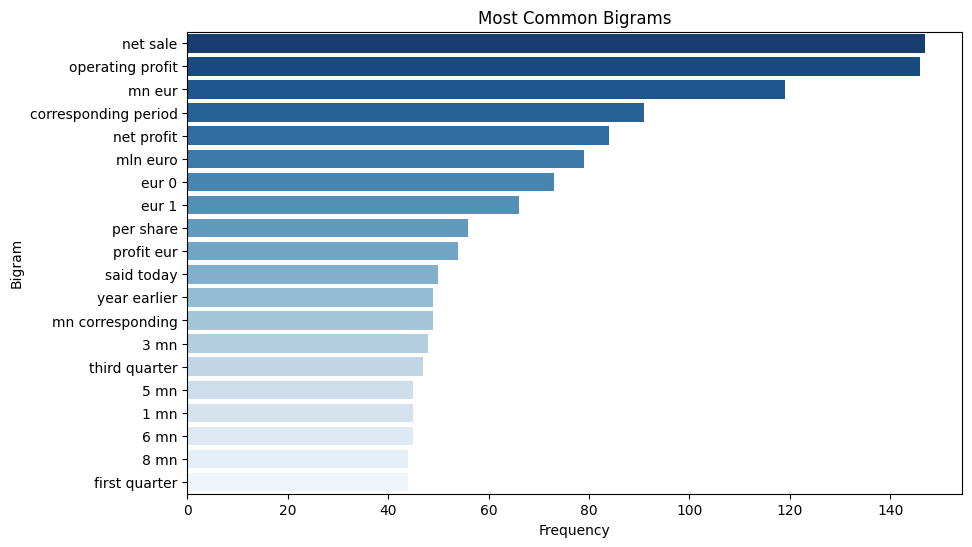

In [61]:
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(20)
bigram_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in bigram_df['Bigram']], data=bigram_df, palette='Blues_r')
plt.title('Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [62]:
df['trigrams'] = df['cleaned_text'].apply(lambda x: get_ngrams(x, 3))
df['trigrams']

,trigrams
0,"[(according, gran, company), (gran, company, p..."
1,"[(last, quarter, 2010), (quarter, 2010, compon..."
2,"[(third, quarter, 2010), (quarter, 2010, net),..."
3,"[(operating, profit, rose), (profit, rose, eur..."
4,"[(operating, profit, totalled), (profit, total..."
...,...
2259,"[(operating, result, 12), (result, 12, month),..."
2260,"[(helsinki, thomson, financial), (thomson, fin..."
2261,"[(london, marketwatch, share), (marketwatch, s..."
2262,"[(operating, profit, fell), (profit, fell, eur..."


<ipython-input-63-f5b9737d1e11>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]} {x[2]}' for x in trigram_df['Trigram']], data=trigram_df, palette='Greens_r')


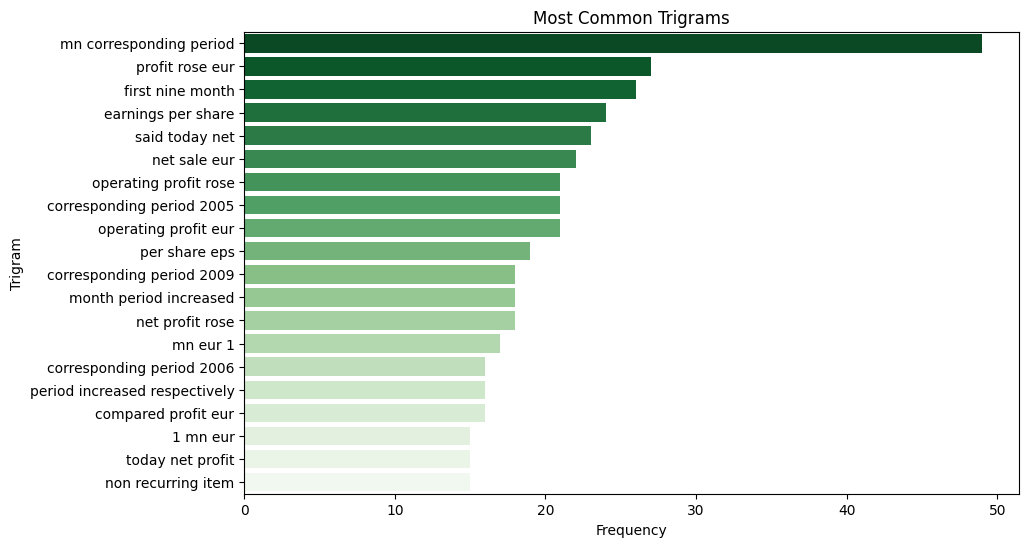

In [63]:
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]
trigram_freq = Counter(all_trigrams)
common_trigrams = trigram_freq.most_common(20)
trigram_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]} {x[2]}' for x in trigram_df['Trigram']], data=trigram_df, palette='Greens_r')
plt.title('Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [64]:
print("Top 5 Bigrams:")
bigram_df[:5]

Top 5 Bigrams:


,Bigram,Frequency
0,"(net, sale)",147
1,"(operating, profit)",146
2,"(mn, eur)",119
3,"(corresponding, period)",91
4,"(net, profit)",84


In [65]:
print("Top 5 Trigrams:")
trigram_df[:5]

Top 5 Trigrams:


,Trigram,Frequency
0,"(mn, corresponding, period)",49
1,"(profit, rose, eur)",27
2,"(first, nine, month)",26
3,"(earnings, per, share)",24
4,"(said, today, net)",23


## TF-IDF Analysis

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

tfidf_matrix

<2264x5371 sparse matrix of type '<class 'numpy.float64'>'
	with 25635 stored elements in Compressed Sparse Row format>

In [67]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '002', ..., 'ñrnits', 'ñrvi', 'ñskyl'], dtype=object)

In [68]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df

,00,000,002,0025,003,0030,007,008,01,0101138,...,ñinen,ñkan,ñl,ñlt,ñn,ñnekoski,ñnnen,ñrnits,ñrvi,ñskyl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
avg_tfidf_scores = tfidf_df.mean(axis=0)
avg_tfidf_scores

,0
00,0.001401
000,0.010888
002,0.000155
0025,0.000116
003,0.000108
...,...
ñnekoski,0.000149
ñnnen,0.000575
ñrnits,0.000099
ñrvi,0.000256


In [70]:
tfidf_scores_df = pd.DataFrame(avg_tfidf_scores, index=feature_names, columns=['Average_TFIDF'])
tfidf_scores_df = tfidf_scores_df.sort_values(by='Average_TFIDF', ascending=False)
tfidf_scores_df

,Average_TFIDF
eur,0.051651
mn,0.039170
profit,0.024101
company,0.023192
sale,0.021373
...,...
n92,0.000061
n82,0.000061
e50,0.000061
n85,0.000061


<ipython-input-71-17a3d3983d97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_TFIDF', y=tfidf_scores_df.head(20).index, data=tfidf_scores_df.head(20), palette='Purples_r')


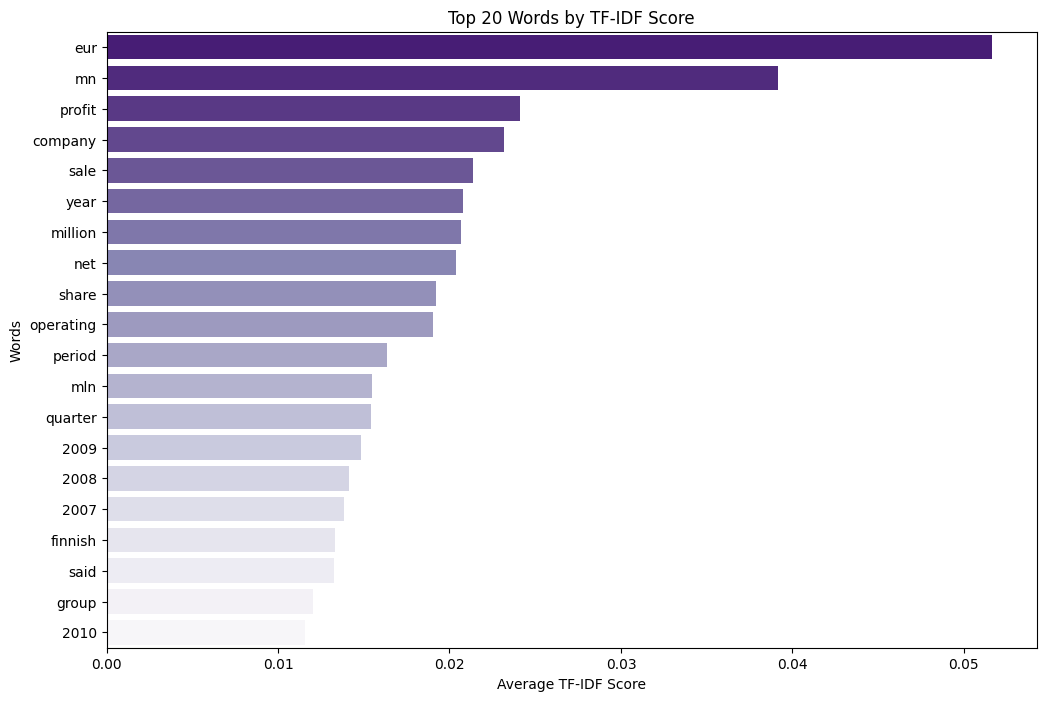

Top 10 Words by TF-IDF Score:
           Average_TFIDF
eur             0.051651
mn              0.039170
profit          0.024101
company         0.023192
sale            0.021373
year            0.020800
million         0.020664
net             0.020380
share           0.019222
operating       0.019019


In [71]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_TFIDF', y=tfidf_scores_df.head(20).index, data=tfidf_scores_df.head(20), palette='Purples_r')
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Words')
plt.show()

print("Top 10 Words by TF-IDF Score:")
print(tfidf_scores_df.head(10))

In [72]:
df.columns

Index(['sentence', 'label', 'Sentiment', 'text_length', 'cleaned_text',
       'tokenized_text', 'word_lengths', 'document_length', 'bigrams',
       'trigrams'],
      dtype='object')

<ipython-input-73-ca633bff6214>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='text_length', data=df, palette='Set2')


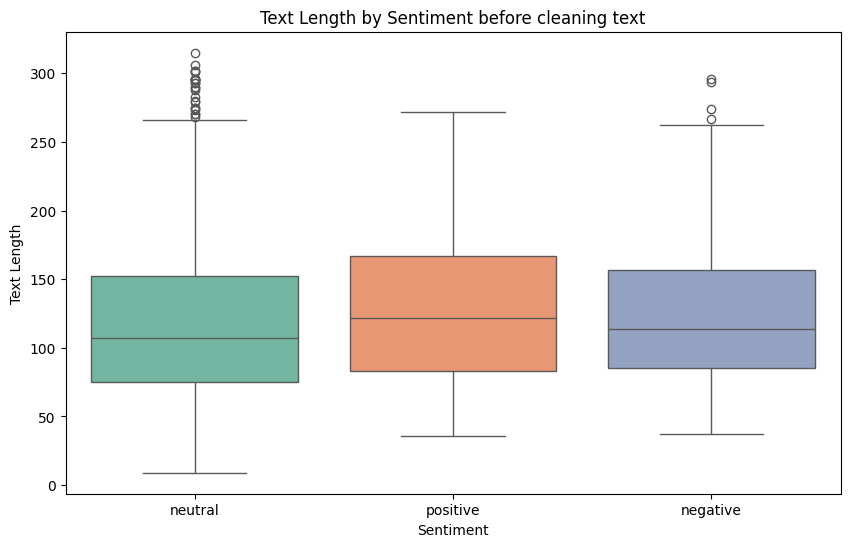

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='text_length', data=df, palette='Set2')
plt.title('Text Length by Sentiment before cleaning text')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

In [74]:
df['avg_word_length']=df['word_lengths'].apply(lambda x: np.mean(x))
df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,sentence,label,Sentiment,text_length,cleaned_text,tokenized_text,word_lengths,document_length,bigrams,trigrams,avg_word_length
0,"According to Gran , the company has no plans t...",1,neutral,127,according gran company plan move production ru...,"[according, gran, company, plan, move, product...","[9, 4, 7, 4, 4, 10, 6, 8, 7, 7]",10,"[(according, gran), (gran, company), (company,...","[(according, gran, company), (gran, company, p...",6.600000
1,"For the last quarter of 2010 , Componenta 's n...",2,positive,193,last quarter 2010 componenta net sale doubled ...,"[last, quarter, 2010, componenta, net, sale, d...","[4, 7, 4, 10, 3, 4, 7, 7, 6, 6, 4, 7, 5, 4, 3,...",21,"[(last, quarter), (quarter, 2010), (2010, comp...","[(last, quarter, 2010), (quarter, 2010, compon...",5.000000
2,"In the third quarter of 2010 , net sales incre...",2,positive,125,third quarter 2010 net sale increased 5 2 eur ...,"[third, quarter, 2010, net, sale, increased, 5...","[5, 7, 4, 3, 4, 9, 1, 1, 3, 3, 1, 2, 9, 6, 2, ...",20,"[(third, quarter), (quarter, 2010), (2010, net...","[(third, quarter, 2010), (quarter, 2010, net),...",3.450000
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive,122,operating profit rose eur 13 1 mn eur 8 7 mn c...,"[operating, profit, rose, eur, 13, 1, mn, eur,...","[9, 6, 4, 3, 2, 1, 2, 3, 1, 1, 2, 13, 6, 4, 12...",19,"[(operating, profit), (profit, rose), (rose, e...","[(operating, profit, rose), (profit, rose, eur...",4.105263
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive,103,operating profit totalled eur 21 1 mn eur 18 6...,"[operating, profit, totalled, eur, 21, 1, mn, ...","[9, 6, 8, 3, 2, 1, 2, 3, 2, 1, 2, 4, 12, 1, 1,...",17,"[(operating, profit), (profit, totalled), (tot...","[(operating, profit, totalled), (profit, total...",3.764706
...,...,...,...,...,...,...,...,...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative,143,operating result 12 month period decreased pro...,"[operating, result, 12, month, period, decreas...","[9, 6, 2, 5, 6, 9, 6, 4, 1, 8, 9, 4, 1, 8, 4]",15,"[(operating, result), (result, 12), (12, month...","[(operating, result, 12), (result, 12, month),...",5.466667
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative,248,helsinki thomson financial share cargotec fell...,"[helsinki, thomson, financial, share, cargotec...","[8, 7, 9, 5, 8, 4, 7, 5, 9, 5, 5, 8, 5, 6, 8, ...",27,"[(helsinki, thomson), (thomson, financial), (f...","[(helsinki, thomson, financial), (thomson, fin...",6.185185
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative,144,london marketwatch share price ended lower lon...,"[london, marketwatch, share, price, ended, low...","[6, 11, 5, 5, 5, 5, 6, 6, 7, 4, 5, 6, 6, 7, 8,...",17,"[(london, marketwatch), (marketwatch, share), ...","[(london, marketwatch, share), (marketwatch, s...",5.823529
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative,108,operating profit fell eur 35 4 mn eur 68 8 mn ...,"[operating, profit, fell, eur, 35, 4, mn, eur,...","[9, 6, 4, 3, 2, 1, 2, 3, 2, 1, 2, 4, 9, 6, 4, ...",20,"[(operating, profit), (profit, fell), (fell, e...","[(operating, profit, fell), (profit, fell, eur...",3.500000


<ipython-input-75-849af3b6ac18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='avg_word_length', data=df, palette='Set2')


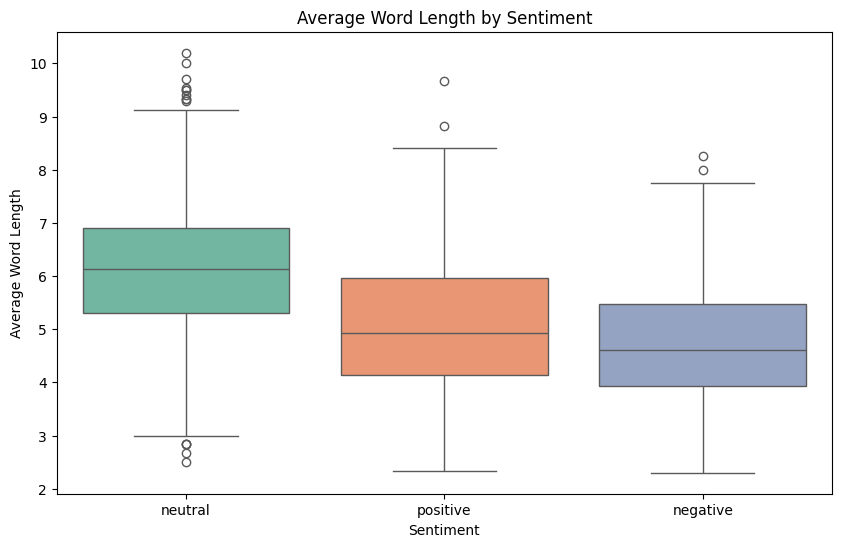

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='avg_word_length', data=df, palette='Set2')
plt.title('Average Word Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Length')
plt.show()

## Sentiment Vs N-gram analysis

In [78]:
def get_most_common_ngrams(sentiment, n, df):
    all_ngrams = [ngram for sublist in df[df['Sentiment']==sentiment][n] for ngram in sublist]
    ngram_freq = Counter(all_ngrams)
    common_ngrams = ngram_freq.most_common(20)
    ngram_df = pd.DataFrame(common_ngrams, columns=[n, 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')
    plt.title(f'Most Common {n} for {sentiment} sentiment')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}')
    plt.show()

<ipython-input-78-ea6c3c0481a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')


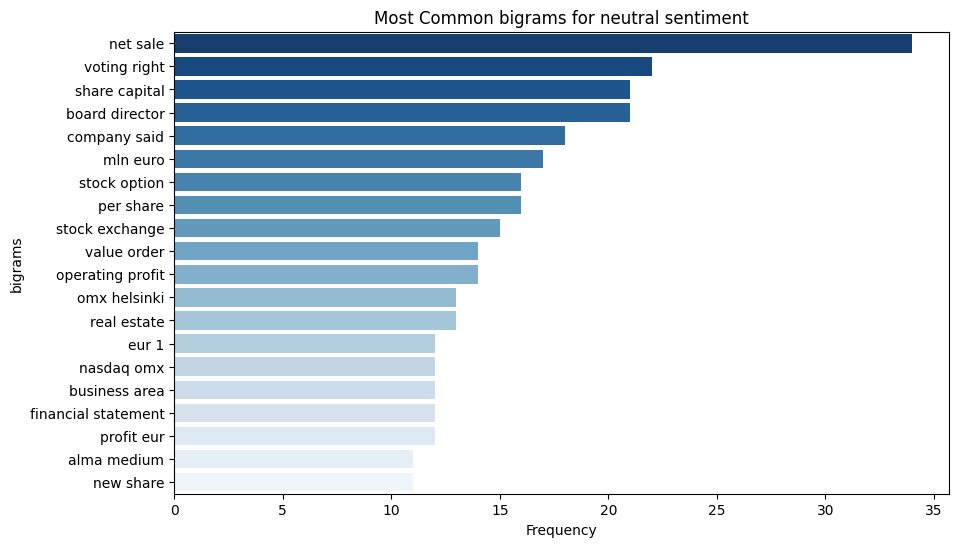

<ipython-input-78-ea6c3c0481a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')


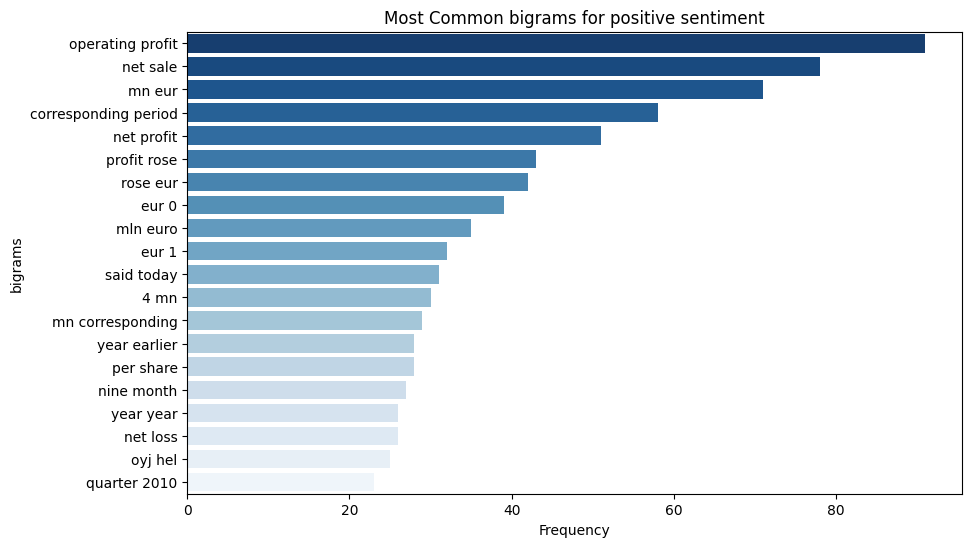

<ipython-input-78-ea6c3c0481a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')


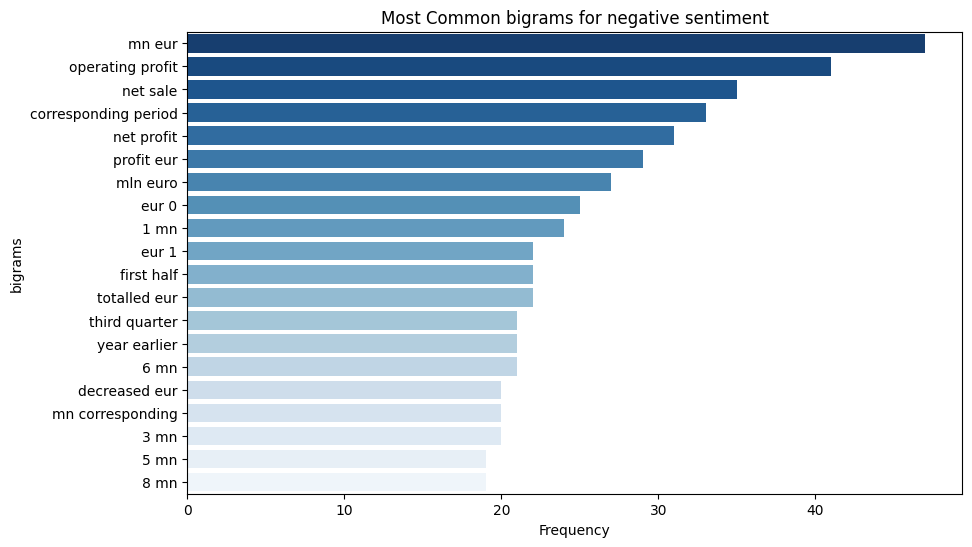

<ipython-input-78-ea6c3c0481a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')


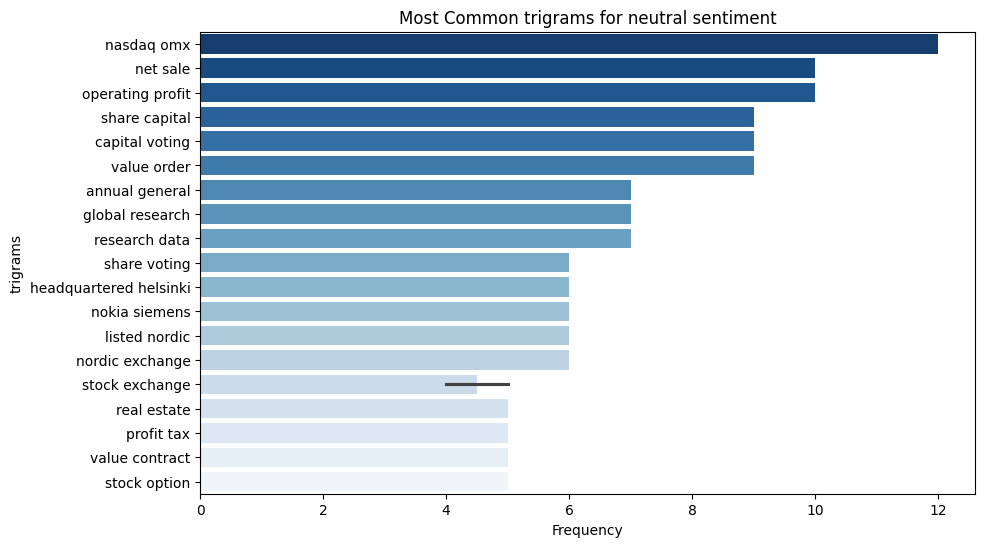

<ipython-input-78-ea6c3c0481a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')


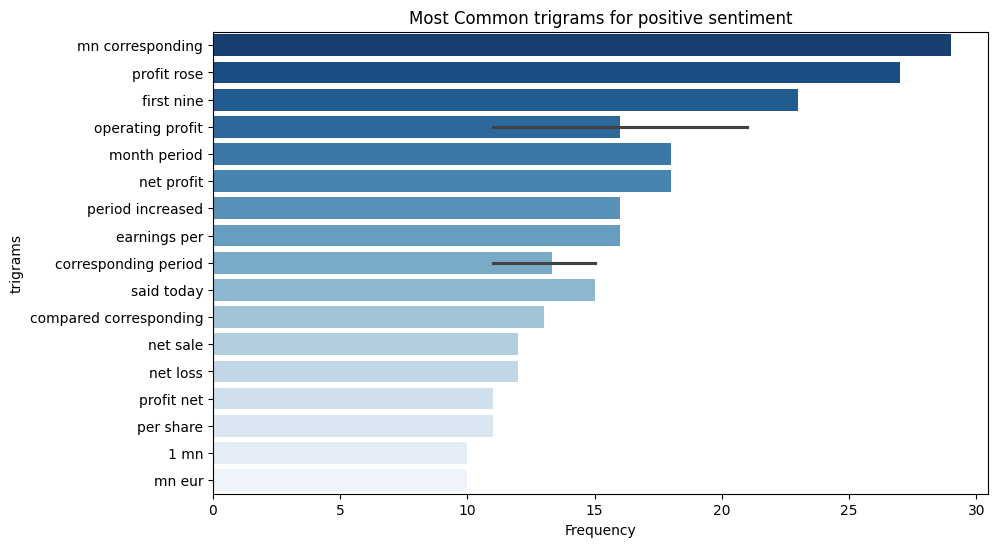

<ipython-input-78-ea6c3c0481a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')


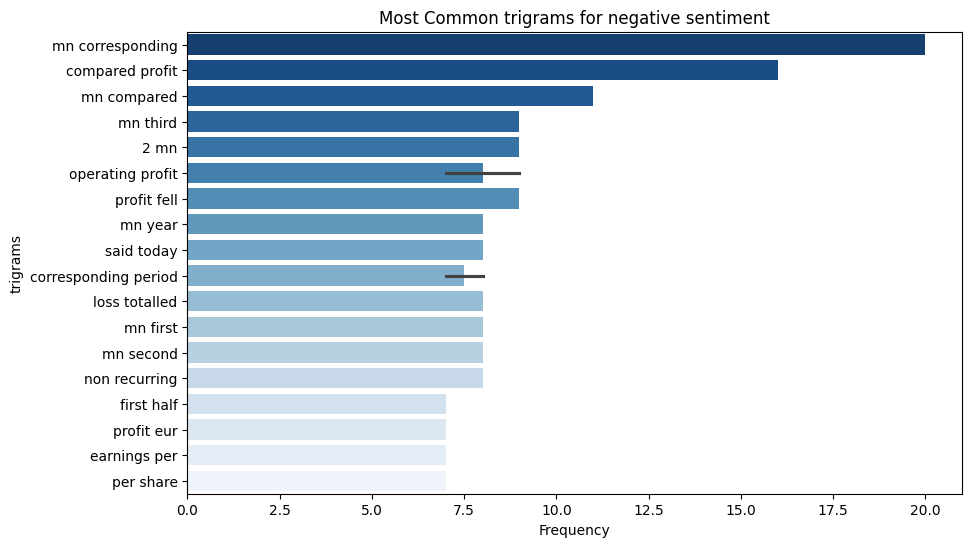

In [79]:
ngrams = ['bigrams','trigrams']
for n in ngrams:
    for sentiment in df['Sentiment'].unique():
        get_most_common_ngrams(sentiment,n,df)

In [80]:
df.to_csv('Preprocessed_Data.csv',index=False)